tomado de: https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html 

Qué es la Correlación Lineal?

Primero debemos aclarar este concepto antes de crear modelos de regresión.

La correlación es un método estadístico que nos permite cuantificar la relación lineal existente entre dos variables cuantitativas. Existen varios estadísticos, llamados coeficientes de correlación lineal, que se han desarrollado con el objetivo de determinar el tipo de asociación, los más empleados son:
-Pearson
-Sperman
-Kendal

Si las variables presentan un nivel de correlación importante se procede con la creación de modelos, en caso contrario no tendría sentido generar el modelo. Cuidado: el hecho que exista correlación lineal, no quiere decir que sea sinónimo de causalidad, puesto que la relación puede estar determinada por un tercer factor


Para facilitar el análisis tomemos un conjunto de datos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [67]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)

In [109]:
datos = datos[datos['age'] >18.0]
datos.sample()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


Análisis Gráfico:

Text(0.5, 1.0, 'Scatter Plot (weight-height)')

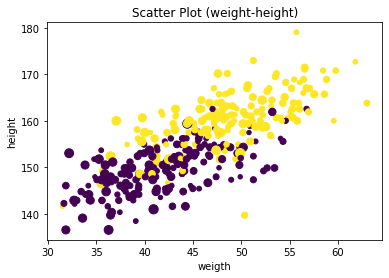

In [108]:
#Construcción del gráfico de dispersión
plt.scatter(datos['weight'], datos['height'], c = datos.male, s = datos.age, cmap = 'viridis' )
plt.xlabel('weigth')
plt.ylabel("height")
plt.title("Scatter Plot (weight-height)")

De acuerdo con el gráfico anterior puede intuirse algun grado de relación lineal entre las variables peso y altura.
-Ambas varuiables son cuantitativas continuas
-Pueden ordenarse y convertirse en un ranking
en principio pueden utlizarse los tres coeficientes indicados anteriormente.

Normalidad

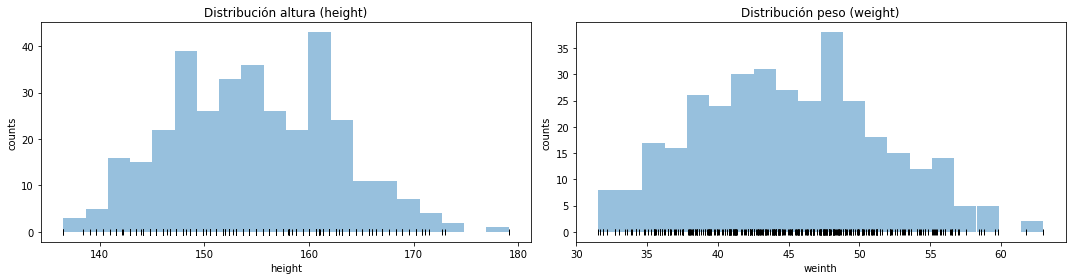

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axs[0].hist(x=datos.height, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('height')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.weight, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('weinth')
axs[1].set_ylabel('counts')

plt.tight_layout();

C:\Users\jhoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jhoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'counts')

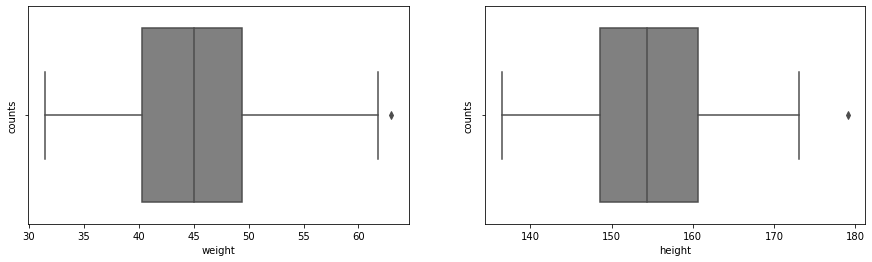

In [128]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(datos.weight, ax= axs[0], color="grey")
axs[0].set_xlabel('weight')
axs[0].set_ylabel('counts')

sns.boxplot(datos.height, ax= axs[1], color = "grey")
axs[1].set_xlabel('height')
axs[1].set_ylabel('counts')



Aplicación de tests Estadísticos Shapiro-Wilk y D'Agostinos K-squared test.

H0: Los datos siguen una distribución normal

ahora si el p-value no es inferior al nivel de referencia alpha dado, no hay evidencias para descartar que los datos se distribuyen de forma normal

In [139]:
#Shapiro-Wilk test
shapiro_test = stats.shapiro(datos.height)
print("variable height:", shapiro_test)
shapiro_test = stats.shapiro(datos.weight)
print("variable weight:", shapiro_test)

variable height: ShapiroResult(statistic=0.9910696148872375, pvalue=0.03439393267035484)
variable weight: ShapiroResult(statistic=0.9911819696426392, pvalue=0.03673496097326279)


In [140]:
#test D'Agostino´s K-squared test
k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2}, p-value = {p_value}")

Variable height: Estadítico = 7.210790495766356, p-value = 0.02717670115638557
Variable weight: Estadítico = 8.402628478646044, p-value = 0.014975881988444985


En el sentido estricto al no seguir una distribución normal, el coeficiente de Pearson se debería descartar, no obstante, cuando se hace el análisis con el logaritmo de las variables la distribución se asemeja a una normal. Por efectos prácticos aplicaremos el test de pearson.

Homocedasticidad

Implica que la varianza se mantiene constante, es decir; gráficamente se puede observar que los dartos no siguen patrones cónicos donde la varianza va aumentando a medidad que crece la variable del eje X. Nótese que en el gráfico no se presentaron patrones cónicos


Coeficientes de Correlación

Pearson:

In [172]:
#implementación paso a paso
#Cov(X, Y) = Sumatoria de (Observaciones en x - la media de X)*(observaciones en y - la media de y)
def corr_pearson(data):
    datos = data.copy()
    Cov = np.sum((datos.weight-np.mean(datos.weight))*(datos.height-np.mean(datos.height)))
    desv_x_y = np.sqrt(np.sum((datos.weight - np.mean(datos.weight))**2)*np.sum((datos.height - np.mean(datos.height))**2))
    return  Cov/desv_x_y

corr_pearson(datos)

0.7528177220327671

In [177]:
datos[['weight', 'height']].corr(method = "pearson")

,weight,height
weight,1.000000,0.751097
height,0.751097,1.000000


In [178]:
datos[['weight', 'height']].corr(method = "spearman")

,weight,height
weight,1.000000,0.751097
height,0.751097,1.000000


In [179]:
datos[['weight', 'height']].corr(method = "kendall")

,weight,height
weight,1.000000,0.563971
height,0.563971,1.000000


Cómo se ajusta una recta de Regresión Lineal??

In [99]:
x = np.array([2,7,6,4,8,3,2,1,5,4])
y = np.array([3,1,2,6,7,9,5,2,4,1])

x_prom = np.mean(x)
x_prom_2 = np.power(x_prom, 2)
x_2_prom = np.mean(np.power(x, 2))
y_prom = np.mean(y)
xy_prom = np.mean([i[0]*i[1] for i in zip(x, y)])

x_prom, y_prom, xy_prom, x_prom_2,x_2_prom

(4.2, 4.0, 16.8, 17.64, 22.4)

In [1]:
m = (x_prom*y_prom-xy_prom)/(x_prom_2-x_2_prom)
b = y_prom-m*x_prom
m, b

NameError: name 'x_prom' is not defined